#Datos para Obj1 - Predicción de Goles del jugador y Obj2 Clusterización de Jugadores

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
rutaArchivo = "D:\WS_ANALITICA_DATOS\sports_prediction\data\data_jugadores.csv"
data_player_soccer = pd.read_csv(rutaArchivo)
data_player_soccer.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,227,Robert Lewandowski,34,2862,23,25.939281,7,6.353777,135,36,2,1,F S,Barcelona,23,25.196005,36.746244,9.871429
1,2370,Karim Benzema,24,2056,19,23.952812,3,6.247547,107,48,1,0,F,Real Madrid,12,18.006583,25.885614,8.579490
2,866,Joselu,34,2989,16,15.871624,2,2.095152,93,22,2,0,F S,Espanyol,11,12.155238,13.920118,2.132708
3,2270,Antoine Griezmann,38,2853,15,11.751190,16,15.643586,111,85,2,0,F M S,Atletico Madrid,15,11.751190,30.893706,11.252617
4,2543,Borja Iglesias,35,2406,15,15.634133,3,2.921825,63,22,2,1,F S,Real Betis,10,11.174591,15.961691,3.046393


Tratamiento de Datos

In [3]:
#conociento nuestra data
for columname in data_player_soccer.columns:
    print('========='*30)
    print(data_player_soccer[columname].value_counts())

id
4120     2
7892     2
6083     2
318      2
7338     2
        ..
10998    1
10990    1
10988    1
10987    1
11602    1
Name: count, Length: 1622, dtype: int64
player_name
Kevin Schade                 2
Pierre-Emerick Aubameyang    2
Ludwig Augustinsson          2
Thomas Delaney               2
Ángel Alarcón                2
                            ..
Pablo Torre                  1
Marcão                       1
Alejandro Alfaro             1
Álex Revuelta                1
Tony Rölke                   1
Name: count, Length: 1617, dtype: int64
games
1     125
33     70
31     59
2      57
27     57
32     56
28     54
30     52
25     50
34     48
26     48
23     47
3      46
29     46
19     46
24     44
36     43
18     43
35     42
22     41
17     39
37     38
12     37
15     35
20     35
16     34
4      33
7      33
11     32
21     32
10     32
8      31
38     30
6      30
14     29
5      28
13     23
9      19
Name: count, dtype: int64
time
1       32
90      13
5   

In [4]:
# Separar las posiciones en columnas individuales y convertirlas en variables binarias =Implementación de one hot encoding
positions_split = data_player_soccer['position'].str.get_dummies(sep=' ')
positions_split.head()

,D,F,GK,M,S
0,0,1,0,0,1
1,0,1,0,0,0
2,0,1,0,0,1
3,0,1,0,1,1
4,0,1,0,0,1


In [5]:
#juntamos datos de dataframe
datos_prediccion_goles = pd.concat([data_player_soccer, positions_split], axis=1)
datos_prediccion_goles.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,...,team_title,npg,npxG,xGChain,xGBuildup,D,F,GK,M,S
0,227,Robert Lewandowski,34,2862,23,25.939281,7,6.353777,135,36,...,Barcelona,23,25.196005,36.746244,9.871429,0,1,0,0,1
1,2370,Karim Benzema,24,2056,19,23.952812,3,6.247547,107,48,...,Real Madrid,12,18.006583,25.885614,8.579490,0,1,0,0,0
2,866,Joselu,34,2989,16,15.871624,2,2.095152,93,22,...,Espanyol,11,12.155238,13.920118,2.132708,0,1,0,0,1
3,2270,Antoine Griezmann,38,2853,15,11.751190,16,15.643586,111,85,...,Atletico Madrid,15,11.751190,30.893706,11.252617,0,1,0,1,1
4,2543,Borja Iglesias,35,2406,15,15.634133,3,2.921825,63,22,...,Real Betis,10,11.174591,15.961691,3.046393,0,1,0,0,1


In [6]:
#Cantidad de registros
datos_prediccion_goles.shape

(1644, 23)

Limpieza de Datos

In [7]:
datos_prediccion_goles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1644 non-null   int64  
 1   player_name   1644 non-null   object 
 2   games         1644 non-null   int64  
 3   time          1644 non-null   int64  
 4   goals         1644 non-null   int64  
 5   xG            1644 non-null   float64
 6   assists       1644 non-null   int64  
 7   xA            1644 non-null   float64
 8   shots         1644 non-null   int64  
 9   key_passes    1644 non-null   int64  
 10  yellow_cards  1644 non-null   int64  
 11  red_cards     1644 non-null   int64  
 12  position      1644 non-null   object 
 13  team_title    1644 non-null   object 
 14  npg           1644 non-null   int64  
 15  npxG          1644 non-null   float64
 16  xGChain       1644 non-null   float64
 17  xGBuildup     1644 non-null   float64
 18  D             1644 non-null 

In [8]:
#Resetear indice
datos_prediccion_goles.reset_index(drop=True,inplace=True)
datos_prediccion_goles.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Columns: 23 entries, id to S
dtypes: float64(5), int64(15), object(3)
memory usage: 295.5+ KB


In [9]:
#Modificar el nombre de las columnas y la selección de variables
datos_prediccion_goles.drop(['id','player_name','team_title'],axis=1,inplace=True)

In [10]:
#vizualizar datos sin columnas indicadas
datos_prediccion_goles.head()

,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,npg,npxG,xGChain,xGBuildup,D,F,GK,M,S
0,34,2862,23,25.939281,7,6.353777,135,36,2,1,F S,23,25.196005,36.746244,9.871429,0,1,0,0,1
1,24,2056,19,23.952812,3,6.247547,107,48,1,0,F,12,18.006583,25.885614,8.579490,0,1,0,0,0
2,34,2989,16,15.871624,2,2.095152,93,22,2,0,F S,11,12.155238,13.920118,2.132708,0,1,0,0,1
3,38,2853,15,11.751190,16,15.643586,111,85,2,0,F M S,15,11.751190,30.893706,11.252617,0,1,0,1,1
4,35,2406,15,15.634133,3,2.921825,63,22,2,1,F S,10,11.174591,15.961691,3.046393,0,1,0,0,1


In [11]:
datos_prediccion_goles.drop(['position'],axis=1,inplace=True)

In [12]:
datos_prediccion_goles.head()

,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup,D,F,GK,M,S
0,34,2862,23,25.939281,7,6.353777,135,36,2,1,23,25.196005,36.746244,9.871429,0,1,0,0,1
1,24,2056,19,23.952812,3,6.247547,107,48,1,0,12,18.006583,25.885614,8.579490,0,1,0,0,0
2,34,2989,16,15.871624,2,2.095152,93,22,2,0,11,12.155238,13.920118,2.132708,0,1,0,0,1
3,38,2853,15,11.751190,16,15.643586,111,85,2,0,15,11.751190,30.893706,11.252617,0,1,0,1,1
4,35,2406,15,15.634133,3,2.921825,63,22,2,1,10,11.174591,15.961691,3.046393,0,1,0,0,1


In [13]:
#Resetear indice
datos_prediccion_goles.reset_index(drop=True,inplace=True)
datos_prediccion_goles.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Columns: 19 entries, games to S
dtypes: float64(5), int64(14)
memory usage: 244.2 KB


####datos optimizados y tratados#################

Analisis - Correlación
Correlación: grado de relación entre variables. Esta relación puede ser positiva o negativa.
Multicolinealidad: relación perfecta o exacta entre variables.

In [14]:
correlacion = datos_prediccion_goles.corr()
correlacion

,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup,D,F,GK,M,S
games,1.000000,0.907625,0.447281,0.471865,0.489489,0.558387,0.607653,0.613612,0.636625,0.152265,0.455308,0.480984,0.702693,0.649865,0.136568,0.265850,-0.015487,0.341656,-0.111925
time,0.907625,1.000000,0.407752,0.418360,0.457386,0.529763,0.543306,0.586121,0.633355,0.161489,0.410152,0.420048,0.692230,0.700816,0.214253,0.107105,0.117674,0.190481,-0.305507
goals,0.447281,0.407752,1.000000,0.931115,0.543799,0.603104,0.865761,0.570734,0.223222,0.046574,0.982208,0.908983,0.707980,0.305257,-0.197442,0.522975,-0.150929,0.219230,0.039599
xG,0.471865,0.418360,0.931115,1.000000,0.549257,0.599931,0.908034,0.556610,0.235586,0.043136,0.907471,0.985406,0.735609,0.299025,-0.204232,0.573949,-0.166131,0.206883,0.058979
assists,0.489489,0.457386,0.543799,0.549257,1.000000,0.858975,0.651622,0.813079,0.253119,0.039041,0.559227,0.561489,0.719632,0.492648,-0.082406,0.340824,-0.161217,0.347736,0.065243
xA,0.558387,0.529763,0.603104,0.599931,0.858975,1.000000,0.728955,0.934226,0.311770,0.049854,0.612740,0.606990,0.811419,0.570427,-0.056155,0.356904,-0.185042,0.383209,0.043273
shots,0.607653,0.543306,0.865761,0.908034,0.651622,0.728955,1.000000,0.716192,0.356910,0.074765,0.859316,0.905642,0.799345,0.424205,-0.172051,0.568636,-0.217691,0.348263,0.067680
key_passes,0.613612,0.586121,0.570734,0.556610,0.813079,0.934226,0.716192,1.000000,0.370557,0.052399,0.573405,0.554950,0.791760,0.604800,-0.047993,0.330867,-0.204770,0.428873,0.039571
yellow_cards,0.636625,0.633355,0.223222,0.235586,0.253119,0.311770,0.356910,0.370557,1.000000,0.188755,0.216848,0.230612,0.410906,0.444821,0.210807,0.042736,-0.159561,0.243858,-0.040229
red_cards,0.152265,0.161489,0.046574,0.043136,0.039041,0.049854,0.074765,0.052399,0.188755,1.000000,0.048550,0.045258,0.085604,0.108536,0.143665,-0.025217,-0.066641,0.002621,-0.006953


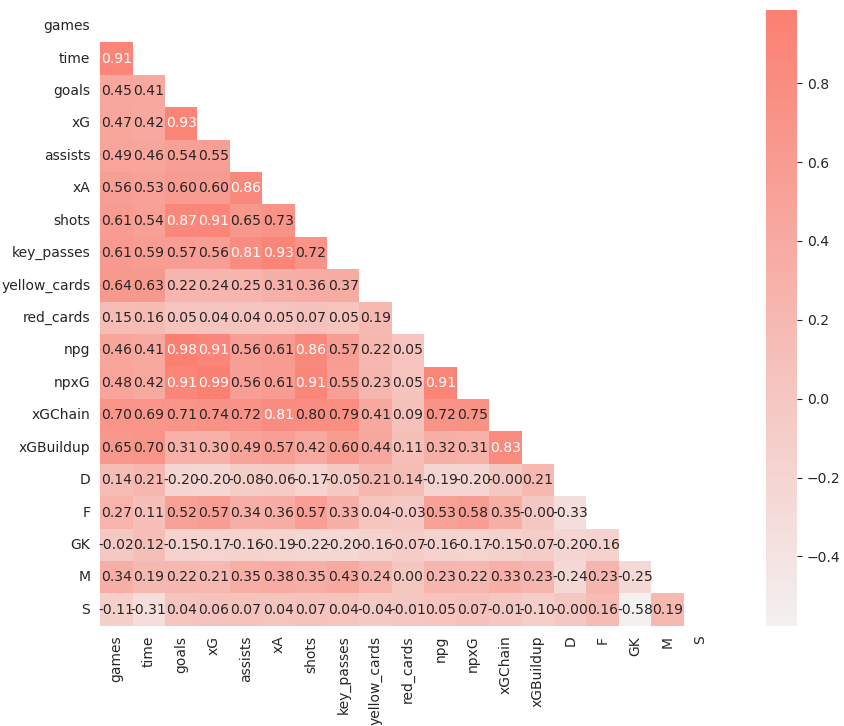

In [15]:
#visualización de las correlaciones
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacion)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacion, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

TRANSFORMACIÓN
Ajustes y Predicción

In [16]:
datos_prediccion_goles['target']=np.where(datos_prediccion_goles['goals']>0,1,0)
datos_prediccion_goles

,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup,D,F,GK,M,S,target
0,34,2862,23,25.939281,7,6.353777,135,36,2,1,23,25.196005,36.746244,9.871429,0,1,0,0,1,1
1,24,2056,19,23.952812,3,6.247547,107,48,1,0,12,18.006583,25.885614,8.579490,0,1,0,0,0,1
2,34,2989,16,15.871624,2,2.095152,93,22,2,0,11,12.155238,13.920118,2.132708,0,1,0,0,1,1
3,38,2853,15,11.751190,16,15.643586,111,85,2,0,15,11.751190,30.893706,11.252617,0,1,0,1,1,1
4,35,2406,15,15.634133,3,2.921825,63,22,2,1,10,11.174591,15.961691,3.046393,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,1,6,0,0.000000,0,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0
1640,1,17,0,0.000000,0,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0
1641,1,4,0,0.000000,0,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0
1642,1,25,0,0.020405,0,0.106534,1,2,0,0,0,0.020405,0.126938,0.000000,0,0,0,0,1,0


In [17]:
# Seleccionar las columnas relevantes
features = ['games', 'time', 'assists', 'shots', 'key_passes', 'yellow_cards', 'red_cards']
target = ['target']

x = datos_prediccion_goles[features]
y = datos_prediccion_goles[target]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

Modelos de Comparación

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, mean_absolute_error, mean_squared_error,recall_score

In [20]:
# Lista de modelos
###Seleccionar modelo y generar
modelos = [
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100)),
    ('SVC', SVC(probability=True)),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('CatBoost',CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss',verbose=False))
]

In [21]:
# Inicializar listas para guardar los resultados
nombres_modelos = []
precisiones = []
sensibilidades = []
maes = []
mses = []
# Evaluar cada modelo
for nombre, modelo in modelos:
    modelo.fit(x_train, y_train)
    predicciones = modelo.predict(x_test)

    precision = accuracy_score(y_test, predicciones)
    sensibilidad = recall_score(y_test, predicciones, average='macro')  
    # Usamos 'macro' para multiclase
    mae = mean_absolute_error(y_test, predicciones)
    mse = mean_squared_error(y_test, predicciones)

    nombres_modelos.append(nombre)
    precisiones.append(precision)
    sensibilidades.append(sensibilidad)
    maes.append(mae)
    mses.append(mse)

    print(f'{nombre} - Accuracy: {precision:.4f}, Recall: {sensibilidad:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}')

Random Forest - Accuracy: 0.7720, Recall: 0.7719, MAE: 0.2280, MSE: 0.2280
Gradient Boosting - Accuracy: 0.7994, Recall: 0.7993, MAE: 0.2006, MSE: 0.2006
SVC - Accuracy: 0.6900, Recall: 0.6883, MAE: 0.3100, MSE: 0.3100
Logistic Regression - Accuracy: 0.8237, Recall: 0.8239, MAE: 0.1763, MSE: 0.1763
KNN - Accuracy: 0.7477, Recall: 0.7474, MAE: 0.2523, MSE: 0.2523
CatBoost - Accuracy: 0.8055, Recall: 0.8052, MAE: 0.1945, MSE: 0.1945


In [22]:
# Crear DataFrame con los resultados
resultados_df = pd.DataFrame({
    'Modelo': nombres_modelos,
    'Precisión': precisiones,
    'Sensibilidad': sensibilidades,
    'MAE': maes,
    'MSE': mses
})
resultados_df

,Modelo,Precisión,Sensibilidad,MAE,MSE
0,Random Forest,0.772036,0.771879,0.227964,0.227964
1,Gradient Boosting,0.799392,0.799320,0.200608,0.200608
2,SVC,0.689970,0.688281,0.310030,0.310030
3,Logistic Regression,0.823708,0.823860,0.176292,0.176292
4,KNN,0.747720,0.747450,0.252280,0.252280
5,CatBoost,0.805471,0.805233,0.194529,0.194529


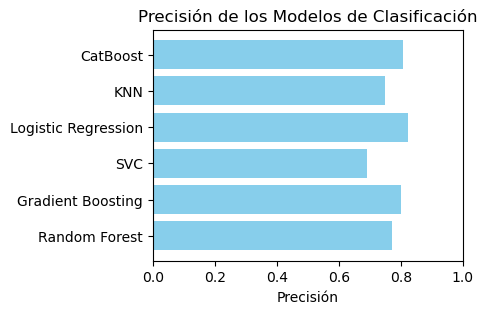

In [23]:

# Mostrar gráfico de precisión
plt.figure(figsize=(4, 3))
plt.barh(nombres_modelos, precisiones, color='skyblue')
plt.xlabel('Precisión')
plt.title('Precisión de los Modelos de Clasificación')
plt.xlim(0, 1)
plt.show()


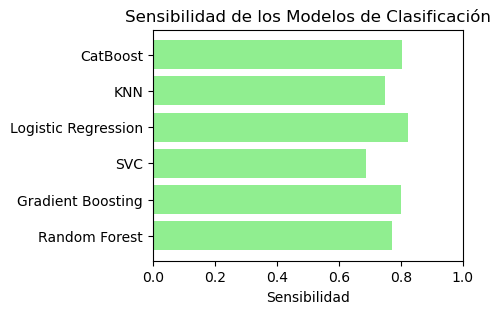

In [24]:
plt.figure(figsize=(4, 3))
plt.barh(nombres_modelos, sensibilidades, color='lightgreen')
plt.xlabel('Sensibilidad')
plt.title('Sensibilidad de los Modelos de Clasificación')
plt.xlim(0, 1)
plt.show()

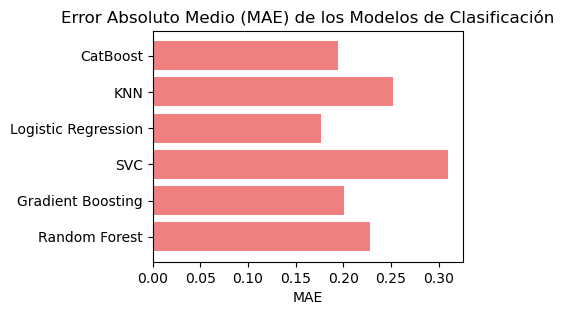

In [25]:
# Mostrar gráfico de MAE
plt.figure(figsize=(4, 3))
plt.barh(nombres_modelos, maes, color='lightcoral')
plt.xlabel('MAE')
plt.title('Error Absoluto Medio (MAE) de los Modelos de Clasificación')
plt.show()


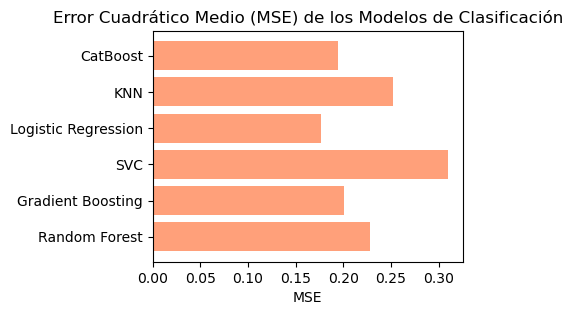

In [26]:

# Mostrar gráfico de MSE
plt.figure(figsize=(4, 3))
plt.barh(nombres_modelos, mses, color='lightsalmon')
plt.xlabel('MSE')
plt.title('Error Cuadrático Medio (MSE) de los Modelos de Clasificación')
plt.show()

In [27]:
#modelo seleccionado para generar y entrenar
modelCatBoost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss',verbose=False)
modelCatBoost.fit(x_train, y_train)

In [33]:
#Importar Modelo
import pickle
pickle.dump(modelCatBoost, open('modelocatboost.pkl', 'wb'))

#features = ['games', 'time', 'assists', 'shots', 'key_passes', 'yellow_cards', 'red_cards']
#predecir gool =binario (0 y 1)

In [32]:
#Predicción anoto el gol =1
model_predicion =pickle.load(open('modelocatboost.pkl', 'rb'))
model_predicion.predict(np.array([50,400,1,34,0,5,1]))

1

In [31]:
#predicción No anoto el gol =0
model_predicion =pickle.load(open('modelocatboost.pkl', 'rb'))
model_predicion.predict(np.array([50,20,1,10,0,5,1]))

0